# Data-Driven Customer Segmentation and Targeting for A2Z Insurance.

#### Abstract

It's 2016.

A2Z became one of the largest insurers in Portugal. However, the lack of a data driven culture in the company ultimately led to poorly maintained databases over the years.
A2Z is trying to make better use of the database it has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no attempts to identify target markets for cross-selling opportunities.
Now, A2Z wants start differentiating customers, and developing more focused programs.

A2Z provided you an ABT (Analytic Based Table) with data regarding a sample of 10.290 Customers from its active database.
These are customers that had at least one insurance service with the company at the time the dataset was extracted.

<div class="alert alert-block alert-warning">

<b>Objective.</b>
Your job is to
- **Segment the database and find the relevant clusters of customers**.
To do this, we suggest you
- **segment the customers using different perspectives and approaches**,
as well as
- **Combine and analyze the results**.
A2Z would like to
- **Understand the value and demographics of each customer segment**,
as well as
- **Understand which types of insurance they will be more interested in buying**.

</div>

<div class="alert alert-block alert-warning">

<b>Simplification.</b>
- No further information provided about the meaning of the area codes
- Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
- Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
- Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current
year, paid in previous one(s).

</div>



#### Dataset Metadata

| Variable 		      | Identifier    | Description                             | Additional Information |
|---------------------|---------------|-----------------------------------------|------------------------|
| ID 		          | CustID        | Customer Identifier                     |                        |
| First Policy 		  | FirstPolYear  | Year of the customer’s first policy     | (1)                    |
| Birthday            | BirthYear     | Customer’s Birthday Year                | (2)                    |
| Education           | EducDeg       | Academic Degree                         |                        |
| Salary              | MonSal        | Gross monthly salary (€) 		             |                        |
| Area 		          | GeoLivArea    | Living area 		                          | (3)                    |
| Children 		      | Children      | Binary variable (Y=1) 		                |                        |
| CMV 		          | CustMonVal    | Customer Monetary Value 		              | (4)                    |
| Claims 		      | ClaimsRate    | Claims Rate 		                          | (5)                    |
| Motor 		      | PremMotor     | Premiums (€) in LOB: Motor 		           | (6)                    |
| Household 		  | PremHousehold | Premiums (€) in LOB: Household 		       | (6)                    |
| Health 		      | PremHealth    | Premiums (€) in LOB: Health 		          | (6)                    |
| Life 		          | PremLife      | Premiums (€) in LOB: Life 		            | (6)                    |
| Work Compensation   | PremWork      | Premiums (€) in LOB: Work Compensations | (6)                    |

<br>

1. May be considered as the first year as a customer
2. The current year of the database is 2016
3. No further information provided about the meaning of the area codes
4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current
year, paid in previous one(s).

<div>

[1. Exploratory Data Analysis __(EDA)__](#1.-exploratory-data-analysis-__(eda)__)
- [1.1 Load datasets](1.1-load-datasets)
- [1.2 Basic Data Exploration](1.2-basic-data-exploration)
    - [Examining the Dataset](examining-the-dataset)
    - [Statistical Summary](statistical-summary)
    - [Inspect Categorical Values](inspect-categorical-values)
- [1.3 Visual Data Exploration](1.3-visual-data-exploration)
    - [Numeric Variables Frequencies]()
    - [Categorical Variables' Frequencies]()
- [1.4 Incoherence Check](1.4-incoherence-check)
    - [Check for Missing & Duplicate Values]()
    - [Detect Outliers]()
    - [inconsistent Values]()

__Import required libraries__

In [1705]:
#libraries imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingClassifier
import scipy.stats as stats
import xgboost as xgb
import os
import sys

%reload_ext autoreload
%autoreload 2
module_path = os.path.abspath(os.path.join('..')) # or the path to your source code
sys.path.append(module_path)
import warnings
warnings.filterwarnings("ignore")
from src.utils.helpers import *

__Load Config files__

In [1706]:
# Load the config file
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
figures_path = config['assets']['figures_path']
images_path = config['assets']['images_path']

helper = Helper()

### 1. Exploratory Data Analysis __(EDA)__

Exploratory Data Analysis __(EDA)__, Process of examining and understanding the structure of a dataset. It's a critical part of any machine learning project, and helps to approach data and get comfortable with all sorts of its characteristics.

##### 1.1 Load Dataset

In [1707]:
# load train data sets
df = load_data(config['data']['train_path'])

In [1708]:
# Indexing
df['CustID'] = df.CustID.astype(int)
df.set_index('CustID', inplace=True)

 ##### 1.2 Basic Data Exploration
Understand the content and the distribution of the datasets we are using and data types of the variables of it and if there are any missing values.

__Examining the DataSet__

__`head()`__ check first five rows of our dataset.
__`info()`__ check data types of the variables of our dataset and if there are any missing values.


In [1709]:
df.head(5)

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [1710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10296 entries, 1 to 10296
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   10266 non-null  float64
 1   BirthYear      10279 non-null  float64
 2   EducDeg        10279 non-null  object 
 3   MonthSal       10260 non-null  float64
 4   GeoLivArea     10295 non-null  float64
 5   Children       10275 non-null  float64
 6   CustMonVal     10296 non-null  float64
 7   ClaimsRate     10296 non-null  float64
 8   PremMotor      10262 non-null  float64
 9   PremHousehold  10296 non-null  float64
 10  PremHealth     10253 non-null  float64
 11  PremLife       10192 non-null  float64
 12  PremWork       10210 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


__Statistical Summary__

__`describe()`__ method give us a birds-eye view of our data. Get the main descriptive statistics for all the variables.

In [1711]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10279.0,NaN,NaN,NaN,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10279,4,b'3 - BSc/MSc',4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260.0,NaN,NaN,NaN,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0
GeoLivArea,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
Children,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42
PremHousehold,10296.0,NaN,NaN,NaN,210.431192,352.595984,-75.0,49.45,132.8,290.05,25048.8


__Inspect Categorical Values__

__`describe(include =['O'] `__ method give us the descriptive statistics for categorical data.

In [1712]:
df.describe(include=['O']).T

,count,unique,top,freq
EducDeg,10279,4,b'3 - BSc/MSc',4799


<div class="alert alert-block alert-warning">

<b>Insights</b>

After the initially analyzing for the columns, we can conclude that:

- Missing values: Output shows that some columns have fewer non-null values than the total number of rows in the DataFrame. This suggests that there are missing values in some columns. We will need to decide how to handle missing values before performing any statistical analysis on the data.
- Data types: Output indicates that 11 columns having a data type of float64 (numerical data) and 1 column having a data type of object (categorical data). will need to ensure that you are using the appropriate techniques and tools for the data types of each column.
- `Children` A binary variable that can be treated as categorical as it represent two distinct categories or classes (e.g., "has children" and "does not have children").
- `GeoLivArea` Can be treated as categorical variable as well as it represent distinct categories or classes (e.g., 1, 2, 3, 4).
- Data distributions:  To understand the distribution of values in each column, We would need to visualize the data using histograms or other appropriate plots. These plots can give us a better understanding of the shape of the distribution and identify any outliers or anomalies in the data.

</div>

##### 1.3 Visual Data Exploration

Visual data exploration is a process of using visualizations to gain insights into the characteristics and patterns of a dataset.

In [1713]:
# Define metric and non-metric features.
metric_features = ['FirstPolYear', 'BirthYear', 'MonthSal', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']
non_metric_features = ['GeoLivArea', 'Children', 'EducDeg']

__Numeric Variables' Frequencies__

Let's start by looking at __`Numeric Variables' Uni-variate Distribution`__ in the dataset.

__`Box Plots`__
A box plot takes a single variable and displays information regarding how the data is distributed throughout its quartiles, which essentially means dividing the data into quarters.

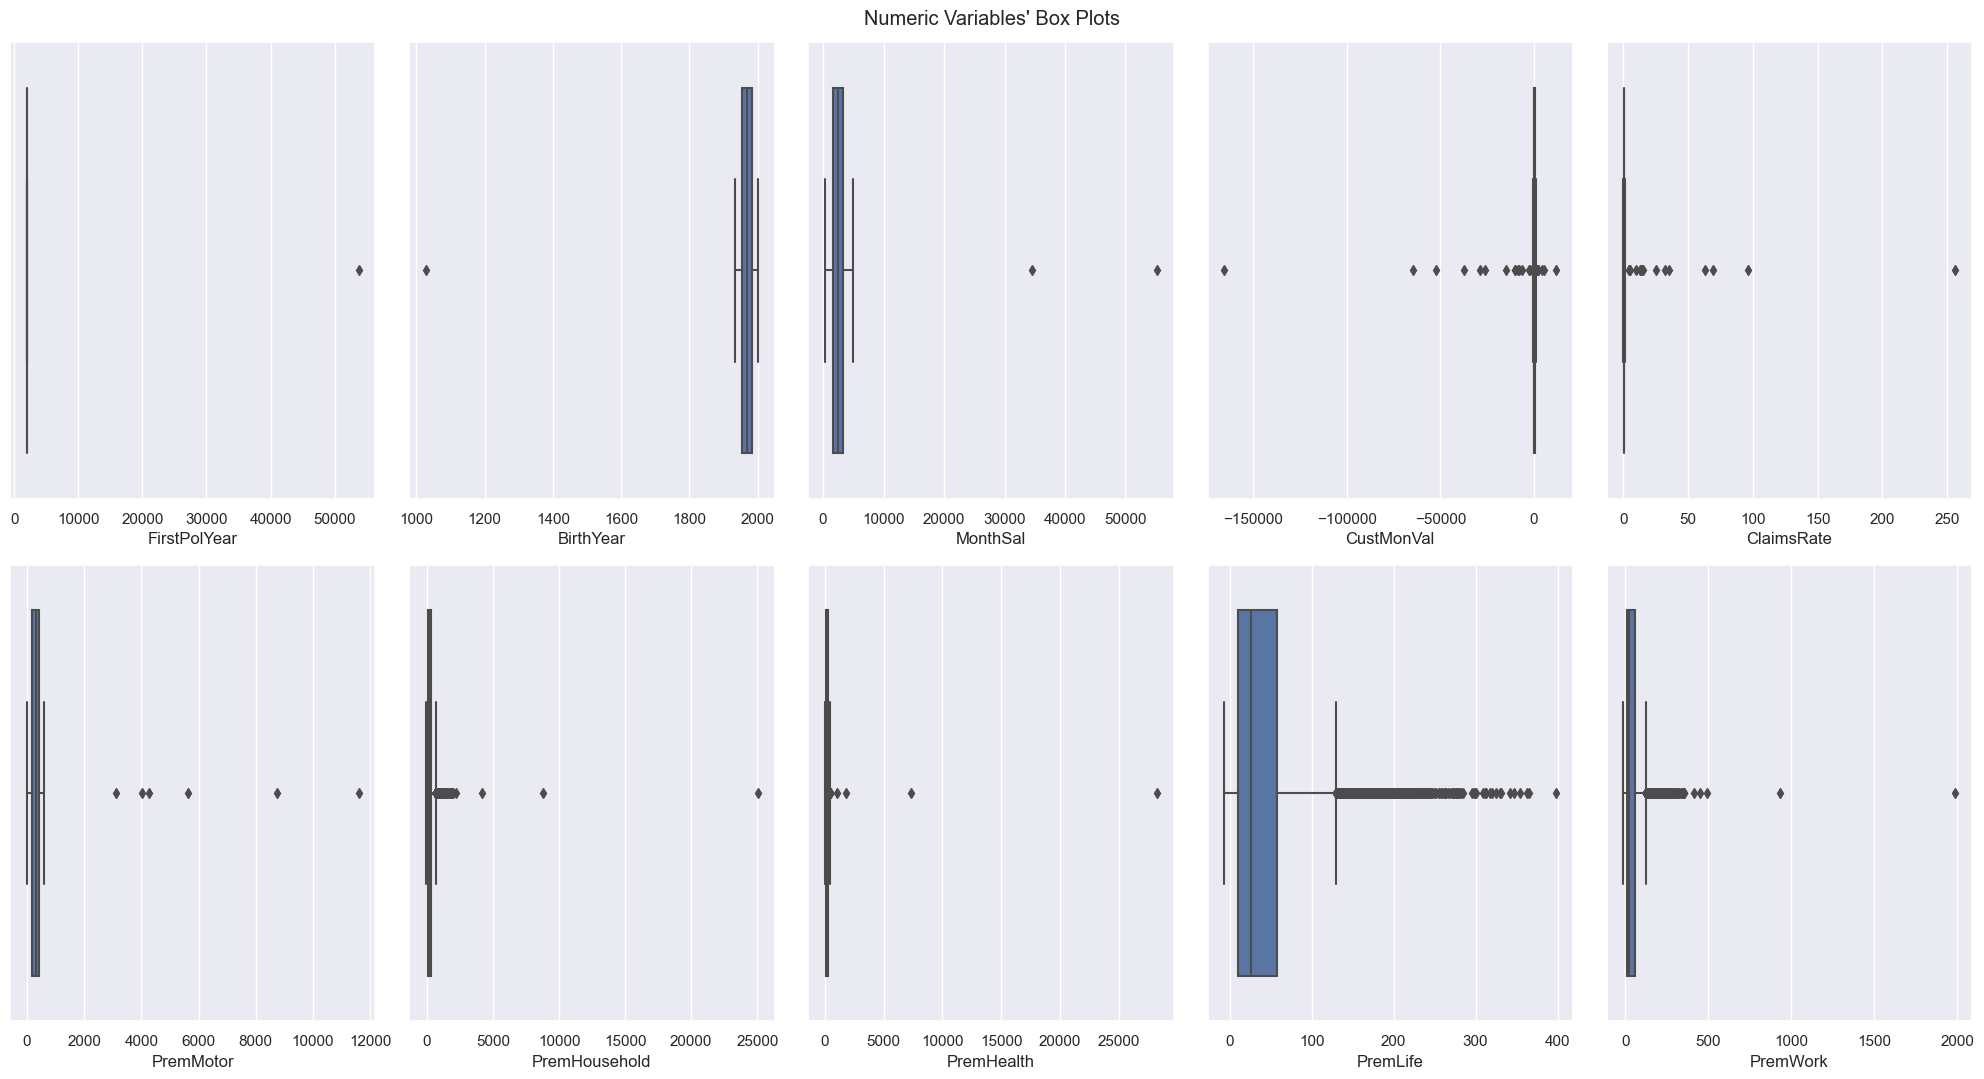

In [1714]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_boxplots.png'), dpi=200)
plt.show()

__`Histograms`__
Histograms show the distribution of a single variable in "bins" or groups of data based on the frequency of the occurrence of the value.

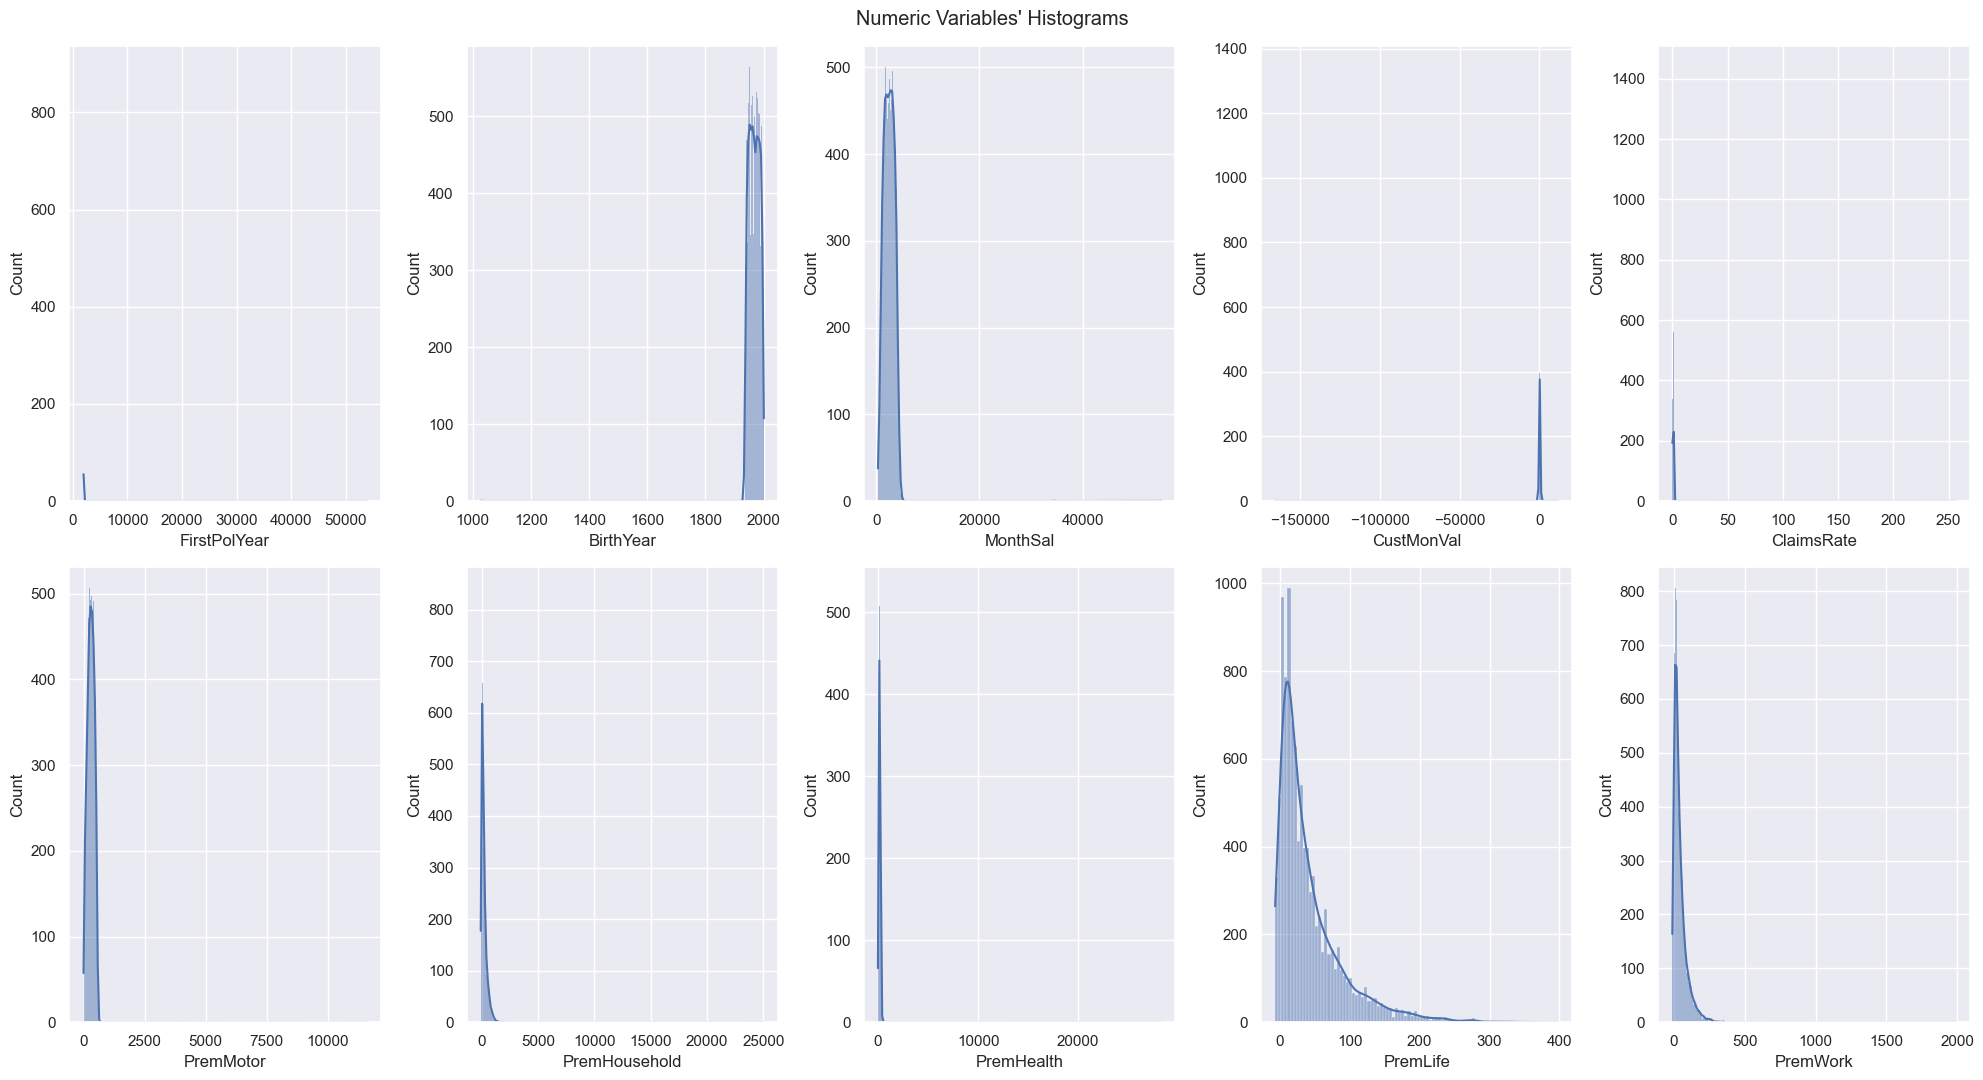

In [1715]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.histplot(x=df[feat], ax=ax, kde=True)
    #ax.hist(df[feat], bins="scott")
    #ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_histograms.png'))
plt.show()

__Categorical Variables' Frequencies__

Let's take a look on __Categorical Variables' Uni-variate Distribution__ in the dataset.

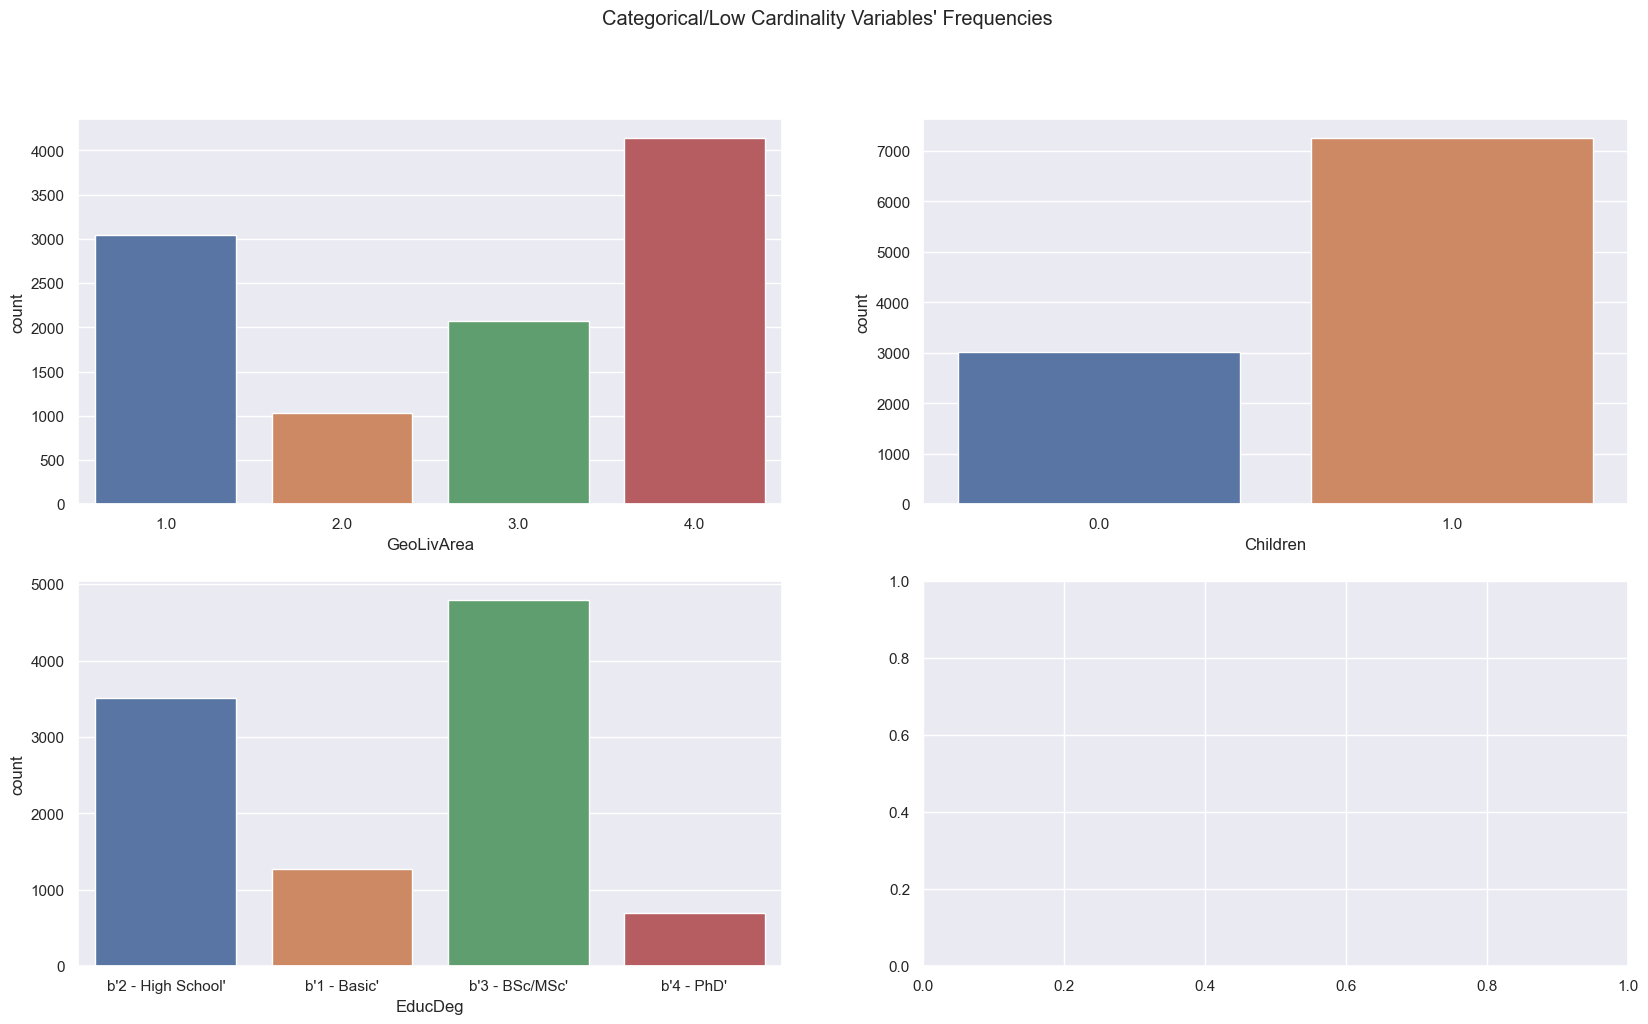

In [1716]:
# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each bar plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.countplot(x=df[feat].astype(object), ax=ax)

title = "Categorical/Low Cardinality Variables' Frequencies"
plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'categorical_variables_frequencies_histograms.png'), dpi=200)
plt.show()

__Data Distribution__

Beside `Visual Inspection` above we still can use `Statistical tests` to detect the distribution of our dataset

- Statistical tests: There are various statistical tests that can be used to formally test the hypothesis that a dataset follows a certain distribution.
- Shapiro-Wilk Test: This test is also used to test for normality, but is more powerful than the D'Agostino's K^2 test and less sensitive than the Anderson-Darling test.

In [1717]:
df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [1718]:
# Use the Shapiro-Wilk test to check if the data is normally distributed
shapiro_results = stats.shapiro(df[metric_features])

# Print the test statistic and p-value
print("Test Statistic:", shapiro_results[0])
print("p-value:", shapiro_results[1])

# If the p-value is less than 0.05, we can reject the null hypothesis
# that the data is normally distributed and conclude that it is not
if shapiro_results[1] < 0.05:
    print("Data is not normally distributed")
else:
    print("Data is normally distributed")

Test Statistic: nan
p-value: 1.0
Data is normally distributed


<div class="alert alert-block alert-warning">

<b>Insights</b>
- uni-variate normal (Gaussian distribution)
- potential uni-variate outliers
</div>

##### 1.4 Incoherence Check

Process of identifying and resolving inconsistencies or discrepancies in data, information, or arguments.
It can occur when there is a lack of consistency or agreement in the data, such as errors, discrepancies, or contradictions in data values or data types.

- Missing Values
- Duplicates
- Outliers
- Find inconsistent values
- Any other problem you may find in your dataset

__Check for Missing & Duplicate Values__

__`isnull`__ & __`isna`__ methods detects nullable and missing values.
__`duplicated`__ method returns boolean Series denoting duplicate rows

In [1719]:
# check for nan/null
df.isnull().values.any()

True

In [1720]:
# count of missing values
df.isna().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [1721]:
# duplicated observations
df.duplicated().sum()

3

__Detect Outliers__

The most common methods for detecting outliers in a normal distribution:

- [__empirical rule / 68-95-99.7 rule__](https://en.wikipedia.org/wiki/68–95–99.7_rule) 99.7% of all data in a normal distribution lies within three standard deviations of the mean so any value lie outside +/- 3 standard deviations consider as outlier.

- [__IQR Rule__](https://en.wikipedia.org/wiki/Interquartile_range) For Any value that is 1.5 x IQR greater than the third quartile is designated as an outlier and any value that is 1.5 x IQR less than the first quartile is also designated as an outlier.+/- 3 standard deviations in our dataset.

- [__Z-Score__](https://en.wikipedia.org/wiki/Standard_score) Measure of how many standard deviations a data point is from the mean of a distribution. A z-score of 3 or more is generally considered an outlier. To use the z-score to identify outliers in a dataset, you can calculate the z-score for each data point and then use a threshold (such as 3) to determine which points are outliers.

In [1722]:
summary, outliers_zscore_df = detect_outliers(data=df, metrics=metric_features, method = 'z_score')
summary

{'CustMonVal': {'threshold': 3, 'count': 13},
 'ClaimsRate': {'threshold': 3, 'count': 12},
 'PremHousehold': {'threshold': 3, 'count': 36}}

In [1723]:
print('Percentage of data kept after removing Z-Score outliers: {} %'.format(np.round((df.shape[0] - outliers_zscore_df.shape[0]) / df.shape[0], 4) * 100))

Percentage of data kept after removing Z-Score outliers: 99.52 %


In [1724]:
summary, outliers_iqr_df = detect_outliers(data=df, metrics=metric_features, method='iqr')
summary

{'FirstPolYear': {'lower': 1962.0, 'upper': 2010.0, 'count': 1},
 'BirthYear': {'lower': 1908.0, 'upper': 2028.0, 'count': 1},
 'MonthSal': {'lower': -670.38, 'upper': 5666.62, 'count': 2},
 'CustMonVal': {'lower': -623.27, 'upper': 1013.6, 'count': 110},
 'ClaimsRate': {'lower': -0.5, 'upper': 1.86, 'count': 15},
 'PremMotor': {'lower': -135.98, 'upper': 734.86, 'count': 6},
 'PremHousehold': {'lower': -311.45, 'upper': 650.95, 'count': 633},
 'PremHealth': {'lower': -50.23, 'upper': 381.85, 'count': 24},
 'PremLife': {'lower': -61.96, 'upper': 129.64, 'count': 625},
 'PremWork': {'lower': -58.51, 'upper': 125.97, 'count': 621}}

In [1725]:
print('Percentage of data kept after removing IQR outliers: {} %'.format(np.round((df.shape[0] - outliers_iqr_df.shape[0]) / df.shape[0], 4) * 100))

Percentage of data kept after removing IQR outliers: 85.79 %


In [1726]:
outliers_iqr_df.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
14,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
41,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
45,1985.0,1990.0,b'3 - BSc/MSc',1065.0,1.0,1.0,-128.68,1.19,111.80,-35.00,208.26,224.71,44.23
52,1982.0,1966.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,-9.00


<div class="alert alert-block alert-warning">

<b>Initial Insights</b>

> Determining whether a value is an outlier that should be removed or not is very subjective. And while there are certainly valid reasons for throwing away outliers if they are the result of a computer glitch or a human error, eliminating every extreme value is not always a good idea.

1. __First Policy__:
    - Apparently, the First Policy Year for a customer cannot be older than the customer or after 2016.
    - 1997 records found where First Policy Year older than Birth Year
        - Correct the values: We can't identify the correct values for that data field it may require some research or consultation with subject-matter experts.
                - It appears that two columns in our dataset were mixed up during data entry, causing incorrect values to be entered in the wrong columns for some rows.
                -  Swapping these columns can help to avoid reducing the reliability and robustness of our analysis if dropped.
        - Ignore the values: Inconsistent values not a small minority of the overall dataset (around 20%) it can have significantly impact on analysis if ignored.
        - Use imputation: Imputation method to estimate the values based on the rest of the data not possible as well.
        - Drop the values: W may need to consider dropping the rows containing the incorrect values from dataset. it is important to carefully consider the potential impact of dropping the values before proceeding.

2. __Birthday__:
    - According to Portuguese laws, the minimum age for obtaining different types of insurance policies may vary depending on the specific policy and the insurance provider. However, it appears that most insurance providers offer their insurance policies to individuals as young as 18 years old. The results from analyzing outliers in the dataset show that the lower value for BirthYear is 1908, so the BirthYear range is 1908 - 1998.
        - 117 records found where they still -18 year
                - By investigating more in these records to choose best approach to deal with it, noticed some rows have the above issue with First Policy Year

3. __Education__:
   Here are some general guidelines for the age ranges for different levels of education in Portugal:
    - Basic education (ensino básico): Children in Portugal typically start basic education at the age of 6 and complete it at the age of 16.
    - Secondary education (ensino secundário): Children in Portugal typically start secondary education at the age of 12 and complete it at the age of 18.
    - Undergraduate education (ensino superior): Students in Portugal typically start undergraduate education at the age of 18 or 19 and complete it at the age of 22 or 23.
    - Postgraduate education (ensino superior): Students in Portugal typically start postgraduate education at the age of 22 or 23 and complete it at the age of 25 or older.
    Considering the information provided above, we need to make sure to align the ages of customers with their academic degrees to avoid confusion or errors in the data. Any discrepancies between the ages of customers and their academic degrees may cause misunderstanding or confusion when analyzing the data.

4. __Salary__
    - A gross monthly salary is the total amount of money that an employee is paid before any deductions are made for taxes, insurance, or other benefits. In general, it is not possible for a gross monthly salary to be negative.

5. __CMV Customer Monetary Value__
In an insurance company, Customer Monetary Value (CMV) is a measure of the value that a customer brings to the company over a specific period of time. It is typically calculated as the total premium revenue generated by a customer during that time period, minus the costs associated with serving that customer.
`Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)`
    - `annual profit from the customer`: the sum of all Premiums Customer pay for.
    - `number of years that they are a customer`: the current year (2016) minus the first year of policy for the customer.
    - `acquisition cost`: the sum of all customer claims.
    - It is possible for Customer Monetary Value (CMV) to be negative, depending on the specific circumstances. CMV is calculated as the total premium revenue generated by a customer, minus the costs associated with serving that customer. If the costs associated with serving the customer exceed the total premium revenue generated by the customer, the CMV will be negative.
    - It is important to consider the factors that contribute to the CMV of a customer, as this can help a business understand the value that a customer brings over time and identify any opportunities for improving the customer experience or reducing costs.

6. __Claims__
    - Amount paid by the insurance company,  It is possible for the total claims amount for a customer to be negative if the insurance company has paid out more in claims to the customer than the customer has paid in premiums. In this case, the claims amount would be negative because it represents a net loss for the insurance company.
    - It is important for an insurance company to carefully manage its claims process to ensure that it is paying out appropriate amounts to policyholders and minimizing its overall claims costs.

7. __Motor, Household, Health, Life & Work Compensation__
    - Negative premiums may manifest as reversals that occurred in the current year but were paid in previous ones. This suggests that the negative premiums may be the result of premiums that were overpaid in a previous year and are now being refunded to the policyholder.
    - It is important for insurance companies to carefully manage their premium calculations and ensure that policyholders are only paying the correct amount for their coverage.

</div>

**Conclusion:** While some values will be dealt with due to inaccuracy, some extreme values will be kept to further investigate their meaning.

### 2. Data Pre-processing

Machine learning relies on data preprocessing to assess data quality and retrieves critical information that can influence the learning model’s performance.

##### 2.1 Data Cleansing

`Cleansing` - Process of identifying and resolving corrupt, inaccurate, or irrelevant data.

__Data Imputation__

Imputation is a technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.
`Mode Imputation` technique to replace the missing value with the variable with the highest frequency.

In [1727]:
df['FirstPolYear'].fillna(df['FirstPolYear'].median(), inplace=True)
df['BirthYear'].fillna(df['BirthYear'].median(), inplace=True)
df['EducDeg'].fillna(df['EducDeg'].mode()[0], inplace=True)
df['MonthSal'].fillna(df['MonthSal'].median(), inplace=True)
df['GeoLivArea'].fillna(df['GeoLivArea'].median(), inplace=True)

In [1728]:
df['Children'].fillna(0, inplace=True)
df['PremMotor'].fillna(0, inplace=True)
df['PremHealth'].fillna(0, inplace=True)
df['PremLife'].fillna(0, inplace=True)
df['PremWork'].fillna(0, inplace=True)

__Data Wrangling__

Data wrangling is a process that involves gathering, organizing, and cleaning data for analysis. It typically involves tasks such as importing data from various sources, merging and reshaping datasets, and handling missing or incomplete data.

__Find inconsistent values__

Finding inconsistent values, also known as data cleansing or data scrubbing, is the process of identifying and correcting errors or inconsistencies in a dataset. This can be done manually, by reviewing each value in the dataset and checking for errors, or automatically.

Different types of inconsistencies that can occur in a dataset, including:
- Typographical errors: Misspellings, incorrect punctuation, or other mistakes in the data.
- Out-of-range values: Values that fall outside of the expected range for a particular data field.
- Duplicate values: Multiple copies of the same value within the same dataset.
- Inconsistent formatting: Values that are not formatted consistently within the same data field.
- Incomplete or missing values: Values that are blank or incomplete within a data field.

__Birth Year & First Policy Year Filters__

__Swap FirstPolYear & BirthYear Columns__

It appears that two columns in our dataset were mixed up during data entry, causing incorrect values to be entered in the wrong columns for some rows.
Swapping these columns can help to avoid reducing the reliability and robustness of our analysis if dropped.

In [1729]:
filter_1 = ((df['FirstPolYear'] < df['BirthYear']) & ((df['BirthYear'] - df['FirstPolYear']) >= 18))
df_demographics_toSwap = df[filter_1]

# Identify the rows that need to be updated
rows = df_demographics_toSwap.index

# Swap the values in the two columns for the identified rows
df.loc[rows, ["FirstPolYear", "BirthYear"]] = df.loc[rows, ["BirthYear", "FirstPolYear"]].values
df.count()

FirstPolYear     10296
BirthYear        10296
EducDeg          10296
MonthSal         10296
GeoLivArea       10296
Children         10296
CustMonVal       10296
ClaimsRate       10296
PremMotor        10296
PremHousehold    10296
PremHealth       10296
PremLife         10296
PremWork         10296
dtype: int64

__Drop Outliers and inconsistent values__

In [1730]:
filter_2 = (
         ((df['BirthYear'] < 1908) | (df['BirthYear'] > 1998))
        | ((df['BirthYear'] > 1998) & (df['Children'] == 1))
        | (df['FirstPolYear'] > 2016)
)
df_demographics_outliers = df[filter_2]

# Remove outliers rows
df = df.drop(df_demographics_outliers.index, axis=0)
df_demographics_outliers.count()

FirstPolYear     85
BirthYear        85
EducDeg          85
MonthSal         85
GeoLivArea       85
Children         85
CustMonVal       85
ClaimsRate       85
PremMotor        85
PremHousehold    85
PremHealth       85
PremLife         85
PremWork         85
dtype: int64

In [1731]:
df_demographics_outliers

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
14,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
187,1993.0,1999.0,b'1 - Basic',1247.0,2.0,1.0,-128.24,1.07,33.23,1026.30,82.57,75.68,212.15
398,1986.0,2000.0,b'1 - Basic',415.0,1.0,1.0,-218.48,1.22,52.01,348.40,49.01,193.48,225.82
481,1984.0,1999.0,b'1 - Basic',1581.0,4.0,1.0,866.27,0.21,30.34,683.45,98.13,71.68,249.16
527,1982.0,1999.0,b'1 - Basic',840.0,4.0,1.0,-23.54,1.00,132.69,165.60,137.36,129.69,164.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9679,1994.0,1999.0,b'1 - Basic',608.0,2.0,0.0,227.27,0.67,40.23,221.15,72.68,228.82,212.04
9937,1989.0,1999.0,b'1 - Basic',918.0,3.0,1.0,738.24,0.20,29.45,457.85,117.69,275.94,78.35
9948,1987.0,2000.0,b'1 - Basic',422.0,1.0,1.0,-145.58,1.07,36.23,1409.15,66.68,14.78,171.59


__Fix First Policy Year For Some Customers__

In [1732]:
filter_3 = ((df['FirstPolYear'] - df['BirthYear']) < 18)

df_demographics_toFix = df[filter_3]

df_demographics_toFix['FirstPolYear'] = df_demographics_toFix['BirthYear']+18

df.loc[df_demographics_toFix.index, 'FirstPolYear'] = df_demographics_toFix['FirstPolYear'].values

df_demographics_toFix

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1,2000.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2,2013.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
4,1999.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1991.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
8,1992.0,1974.0,b'2 - High School',1743.0,4.0,1.0,-144.91,1.13,248.27,397.30,144.36,66.68,53.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10284,1997.0,1979.0,b'2 - High School',1219.0,4.0,1.0,211.60,0.60,236.60,18.35,162.81,76.57,90.35
10285,2005.0,1987.0,b'3 - BSc/MSc',1504.0,4.0,1.0,-1.55,0.96,390.63,29.45,179.70,-6.00,0.00
10289,2011.0,1993.0,b'2 - High School',1465.0,1.0,1.0,795.15,0.35,67.79,820.15,102.13,182.48,86.46


In [1733]:
# Negative premiums reversals occurred in the current year, paid in previous one(s). set it to 0
df['PremWork'][df['PremWork'] <= 0] = 0
df['PremLife'][df['PremLife'] <= 0] = 0
df['PremHealth'][df['PremHealth'] <= 0] = 0
df['PremMotor'][df['PremMotor'] <= 0] = 0
df['PremHousehold'][df['PremHousehold'] <= 0] = 0

__Outliers Removal__

As explained at point __Detect Outliers__ above we're going to process and drop outliers from IQR, Z-Score and Manual filters.

In [1734]:
summary, outliers_zscore_df = detect_outliers(data=df, metrics=metric_features, method = 'z_score')
summary

{'MonthSal': {'threshold': 3, 'count': 2},
 'CustMonVal': {'threshold': 3, 'count': 13},
 'ClaimsRate': {'threshold': 3, 'count': 12},
 'PremMotor': {'threshold': 3, 'count': 6},
 'PremHousehold': {'threshold': 3, 'count': 33},
 'PremHealth': {'threshold': 3, 'count': 3},
 'PremLife': {'threshold': 3, 'count': 218},
 'PremWork': {'threshold': 3, 'count': 152}}

In [1735]:
summary, outliers_iqr_df = detect_outliers(data=df, metrics=metric_features, method='iqr')
summary

{'MonthSal': {'lower': -614.5, 'upper': 5637.5, 'count': 2},
 'CustMonVal': {'lower': -621.65, 'upper': 1010.17, 'count': 105},
 'ClaimsRate': {'lower': -0.5, 'upper': 1.86, 'count': 15},
 'PremMotor': {'lower': -131.14, 'upper': 732.14, 'count': 6},
 'PremHousehold': {'lower': -305.33, 'upper': 639.28, 'count': 614},
 'PremHealth': {'lower': -51.6, 'upper': 382.04, 'count': 22},
 'PremLife': {'lower': -59.56, 'upper': 125.35, 'count': 632},
 'PremWork': {'lower': -57.96, 'upper': 122.96, 'count': 626}}

In [1736]:
# Combine the dataframes
outliers_stage1_df = pd.concat([outliers_iqr_df, outliers_zscore_df], axis=0, join="outer")

outliers_stage1_df

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2,2013.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
17,2007.0,1989.0,b'2 - High School',2437.0,1.0,1.0,100.58,0.89,119.80,647.35,168.92,125.58,37.23
41,2013.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03
45,2008.0,1990.0,b'3 - BSc/MSc',1065.0,1.0,1.0,-128.68,1.19,111.80,0.00,208.26,224.71,44.23
52,1984.0,1966.0,b'3 - BSc/MSc',3234.0,4.0,1.0,-14714.08,25.36,557.44,20.00,29.56,5.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,1998.0,1978.0,b'1 - Basic',1750.0,1.0,1.0,293.17,0.61,130.47,271.15,105.13,270.83,47.34
10189,2011.0,1993.0,b'1 - Basic',967.0,3.0,1.0,929.51,0.34,19.45,1085.20,83.35,65.79,196.48
10217,2014.0,1996.0,b'1 - Basic',970.0,4.0,1.0,901.95,0.36,39.23,1070.20,96.24,182.48,63.01


In [1737]:
# Remove outliers rows
df = df.drop(outliers_stage1_df.index, axis=0)

In [1738]:
df

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1,2000.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
3,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4,1999.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5,1991.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
6,1986.0,1956.0,b'2 - High School',2566.0,4.0,1.0,-24.33,1.00,440.75,18.90,114.80,7.00,7.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,1986.0,1943.0,b'2 - High School',3498.0,4.0,0.0,245.60,0.67,227.82,270.60,160.92,100.13,69.90
10292,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10294,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


##### 2.2 Feature Engineering

`Feature engineering` is the process that takes raw data and transforms it into features that can be used to create a predictive model


__Data Type Transformation__
- FirstPolYear -> Int
- BirthYear -> Int
- GeoLivArea -> Int
- Children -> Int

In [1739]:
# Converting float types to int.
df['FirstPolYear'] = df['FirstPolYear'].astype(int)
df['BirthYear'] = df['BirthYear'].astype(int)
df['GeoLivArea'] = df['GeoLivArea'].astype(int)
df['Children'] = df['Children'].astype(int)

__Feature Extraction__

- BirthYear -> Age
- First Policy Year -> LoyaltyYears
- Life, Work, Motor, Health & Household Premiums -> TotalPremium

In [1740]:
# inserting new column 'Age' to carry customer age.
df.insert(2, 'Age', 2016 - df['BirthYear'])

# Number of Years of Loyalty
df.insert(1, 'LoyaltyYears', 2016 - df['FirstPolYear'])

# Summing All premiums
df.insert(15, 'TotalPremium',  df['PremLife'] + df['PremWork'] + df['PremMotor'] + df['PremHealth'] + df['PremHousehold'])

In [1741]:
df.head()

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,2000,16,1982,34,b'2 - High School',2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
3,1991,25,1970,46,b'1 - Basic',2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
4,1999,17,1981,35,b'3 - BSc/MSc',1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
5,1991,25,1973,43,b'3 - BSc/MSc',1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24
6,1986,30,1956,60,b'2 - High School',2566.0,4,1,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,589.12


__Rank categorical variables__

- Education Degree

In [1742]:
df['EducDeg'] = df['EducDeg'].apply(get_education_rank)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8755 entries, 1 to 10296
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstPolYear   8755 non-null   int64  
 1   LoyaltyYears   8755 non-null   int64  
 2   BirthYear      8755 non-null   int64  
 3   Age            8755 non-null   int64  
 4   EducDeg        8755 non-null   int64  
 5   MonthSal       8755 non-null   float64
 6   GeoLivArea     8755 non-null   int64  
 7   Children       8755 non-null   int64  
 8   CustMonVal     8755 non-null   float64
 9   ClaimsRate     8755 non-null   float64
 10  PremMotor      8755 non-null   float64
 11  PremHousehold  8755 non-null   float64
 12  PremHealth     8755 non-null   float64
 13  PremLife       8755 non-null   float64
 14  PremWork       8755 non-null   float64
 15  TotalPremium   8755 non-null   float64
dtypes: float64(9), int64(7)
memory usage: 1.1 MB


__Variable transform__

In [1743]:
# Customer with age 23+ and still in basic or high school
filter_4 = (
    (df['Age'] > 23) & (df['EducDeg'] < 3)
   # | (df['Age'] <= 23) & (df['EducDeg'] > 2)
  # | (df['Age'] <= 18) & (df['EducDeg'] > 2)
)
df_education_incorrect = df[filter_4]

In [1744]:
educ_mode = df[(df['Age'] > 23) & (df['EducDeg'] >= 3)]['EducDeg'].mode()
df_education_incorrect['EducDeg'] = educ_mode.values[0]
df.loc[df_education_incorrect.index, 'EducDeg'] = df_education_incorrect['EducDeg'].values
df

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,2000,16,1982,34,3,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
3,1991,25,1970,46,3,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
4,1999,17,1981,35,3,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
5,1991,25,1973,43,3,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24
6,1986,30,1956,60,3,2566.0,4,1,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,589.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,1986,30,1943,73,3,3498.0,4,0,245.60,0.67,227.82,270.60,160.92,100.13,69.90,829.37
10292,1984,32,1949,67,4,3188.0,2,0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,641.56
10294,1994,22,1976,40,3,2918.0,1,1,524.10,0.21,403.63,132.80,142.25,12.67,4.89,696.24


__Feature Scaling__

`Scaling` is a method used to normalize the range of independent variables or features of data.

__Data Normalization__

`Normalization` is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [1745]:
df_norm_scaled = df.copy()
df_norm_scaled.head(5)

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,2000,16,1982,34,3,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
3,1991,25,1970,46,3,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
4,1999,17,1981,35,3,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
5,1991,25,1973,43,3,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24
6,1986,30,1956,60,3,2566.0,4,1,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,589.12


In [1746]:
# Use MinMaxScaler to scale the data
minMax_scaler = MinMaxScaler()

# Fit scaler & transform training data
df_norm = minMax_scaler.fit_transform(df_norm_scaled)
df_norm_scaled[df.columns] = df_norm

df_norm_scaled.head()

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,0.619048,0.380952,0.746032,0.253968,0.666667,0.393345,0.000000,1.0,0.521961,0.253247,0.642237,0.124335,0.383181,0.376683,0.137418,0.588715
3,0.404762,0.595238,0.555556,0.444444,0.666667,0.414676,0.666667,0.0,0.616928,0.181818,0.352261,0.351330,0.326160,0.691907,0.805630,0.655091
4,0.595238,0.404762,0.730159,0.269841,0.666667,0.163396,1.000000,1.0,0.216437,0.642857,0.311814,0.067840,0.814666,0.283173,0.230575,0.531326
5,0.404762,0.595238,0.603175,0.396825,0.666667,0.305034,1.000000,1.0,0.256528,0.584416,0.578620,0.074804,0.478034,0.150481,0.337239,0.556589
6,0.285714,0.714286,0.333333,0.666667,0.666667,0.476323,1.000000,1.0,0.210802,0.649351,0.753136,0.029577,0.300555,0.056090,0.062403,0.521101


In [1747]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", minMax_scaler.data_min_, "\n", minMax_scaler.data_max_)

Parameters fitted:
 [ 1.9740e+03  0.0000e+00  1.9350e+03  1.8000e+01  1.0000e+00  3.3300e+02
  1.0000e+00  0.0000e+00 -2.9891e+02  0.0000e+00  0.0000e+00  0.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00] 
 [2.01600e+03 4.20000e+01 1.99800e+03 8.10000e+01 4.00000e+00 5.02100e+03
 4.00000e+00 1.00000e+00 1.00364e+03 1.54000e+00 5.85220e+02 6.39000e+02
 3.81960e+02 1.24800e+02 1.22910e+02 1.13053e+03]


In [1748]:
# Checking max and min of df_norm variables
df_norm_scaled.describe().round(2)

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
count,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00
mean,0.43,0.57,0.49,0.51,0.69,0.49,0.57,0.72,0.39,0.44,0.56,0.24,0.44,0.24,0.24,0.63
std,0.21,0.21,0.25,0.25,0.11,0.19,0.42,0.45,0.17,0.20,0.21,0.23,0.20,0.23,0.23,0.11
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.29,0.45,0.27,0.30,0.67,0.33,0.00,0.00,0.22,0.25,0.41,0.06,0.29,0.06,0.07,0.55
50%,0.43,0.57,0.49,0.51,0.67,0.49,0.67,1.00,0.37,0.46,0.57,0.17,0.43,0.17,0.18,0.60
75%,0.55,0.71,0.70,0.73,0.67,0.64,1.00,1.00,0.53,0.64,0.72,0.35,0.58,0.35,0.36,0.68
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


__Data Standardization__

`Standardization` is the process of placing dissimilar features on the same scale. Standardized data in other words can be defined as rescaling the attributes in such a way that their mean is 0 and standard deviation becomes 1.

In [1749]:
df_stand_scaled = df.copy()
df_stand_scaled.head()

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,2000,16,1982,34,3,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,665.56
3,1991,25,1970,46,3,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,740.60
4,1999,17,1981,35,3,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,600.68
5,1991,25,1973,43,3,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,629.24
6,1986,30,1956,60,3,2566.0,4,1,-24.33,1.00,440.75,18.90,114.80,7.00,7.67,589.12


In [1750]:
# Use StandardScaler to scale the data
stand_scaler = StandardScaler()

# Fit scaler & transform training data
df_stand = stand_scaler.fit_transform(df_stand_scaled)
df_stand_scaled[df.columns] = df_stand

In [1751]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", stand_scaler.mean_, "\n", stand_scaler.var_)

Parameters fitted:
 [1.99208795e+03 2.39120503e+01 1.96564420e+03 5.03557967e+01
 3.06076528e+00 2.62345300e+03 2.71090805e+00 7.15019989e-01
 2.03873642e+02 6.76493432e-01 3.28759437e+02 1.53836927e+02
 1.68365768e+02 2.99302342e+01 2.98452907e+01 7.10737657e+02] 
 [8.14195635e+01 8.14195635e+01 2.47764785e+02 2.47764785e+02
 1.00705068e-01 8.23655654e+05 1.60037787e+00 2.03766405e-01
 4.90561630e+04 9.92073956e-02 1.45833930e+04 2.13412173e+04
 5.82330951e+03 8.02365735e+02 7.82393614e+02 1.54349002e+04]


In [1752]:
df_stand_scaled.head()

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,0.876849,-0.876849,1.039087,-1.039087,-0.191483,-0.491930,-1.352432,0.631318,0.799582,-0.909584,0.389946,-0.509198,-0.288371,0.602970,-0.463164,-0.363640
3,-0.120571,0.120571,0.276725,-0.276725,-0.191483,-0.381743,0.228520,-1.583988,1.358081,-1.258821,-1.015301,0.483708,-0.573783,1.991797,2.473060,0.240365
4,0.766024,-0.766024,0.975557,-0.975557,-0.191483,-1.679737,1.018996,0.631318,-0.997189,0.995347,-1.211306,-0.756313,1.871355,0.190982,-0.053816,-0.885867
5,-0.120571,0.120571,0.467315,-0.467315,-0.191483,-0.948100,1.018996,0.631318,-0.761418,0.709608,0.081653,-0.725851,0.186399,-0.393639,0.414879,-0.655984
6,-0.674694,0.674694,-0.612698,0.612698,-0.191483,-0.063305,1.018996,0.631318,-1.030329,1.027096,0.927368,-0.923679,-0.701944,-0.809510,-0.792787,-0.978914


In [1753]:
# Checking mean and variance of standardized variables
df_stand_scaled.describe().round(2)

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
count,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00,8755.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.00,-2.65,-1.95,-2.06,-6.49,-2.52,-1.35,-1.58,-2.27,-2.15,-2.72,-1.05,-2.21,-1.06,-1.07,-5.72
25%,-0.67,-0.54,-0.87,-0.85,-0.19,-0.79,-1.35,-1.58,-0.96,-0.91,-0.75,-0.78,-0.76,-0.78,-0.76,-0.74
50%,-0.01,0.01,0.02,-0.02,-0.19,-0.01,0.23,0.63,-0.08,0.11,0.02,-0.29,-0.06,-0.33,-0.29,-0.24
75%,0.54,0.67,0.85,0.87,-0.19,0.79,1.02,0.63,0.84,0.96,0.79,0.50,0.70,0.50,0.52,0.51
max,2.65,2.00,2.06,1.95,2.96,2.64,1.02,0.63,3.61,2.74,2.12,3.32,2.80,3.35,3.33,3.38


__Comparing unscaled, normalized and standardized data__

It is always great to visualize your data to understand the distribution present. We can see the comparison between our unscaled and scaled data using boxplots.

__Original Data__

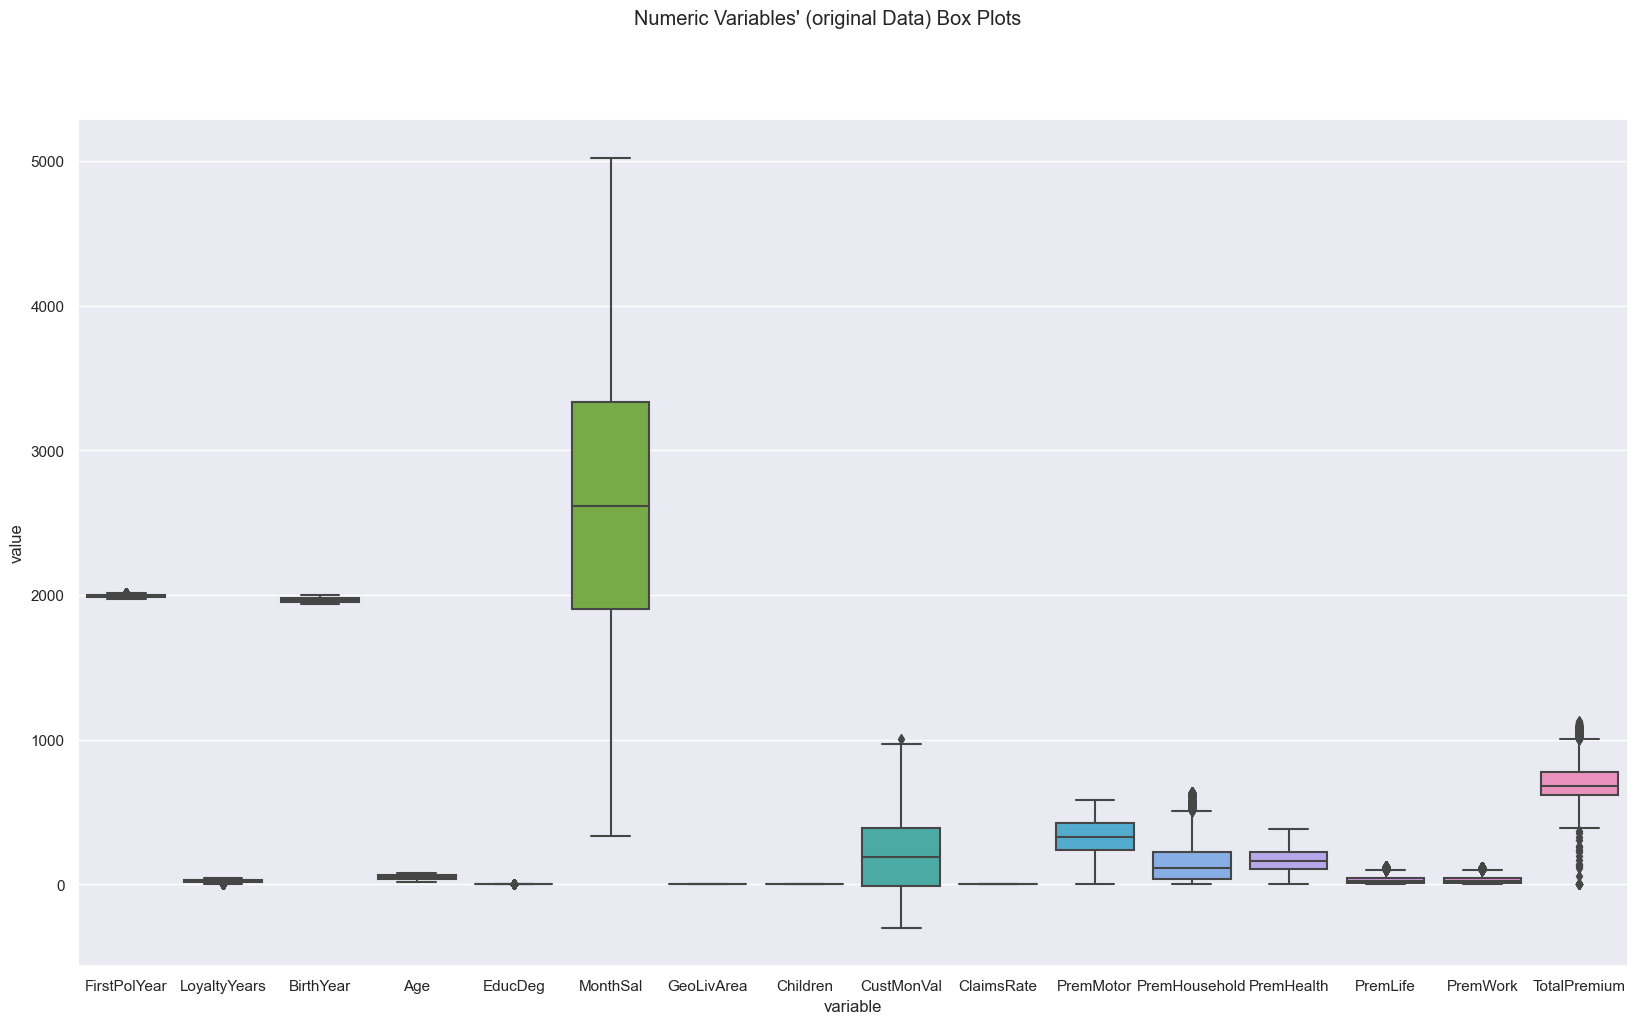

In [1754]:
# All Numeric Variables' Box Plots
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(df))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (original Data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_original_data_boxplots.png'), dpi=200)
plt.show()

__Normalized Data__

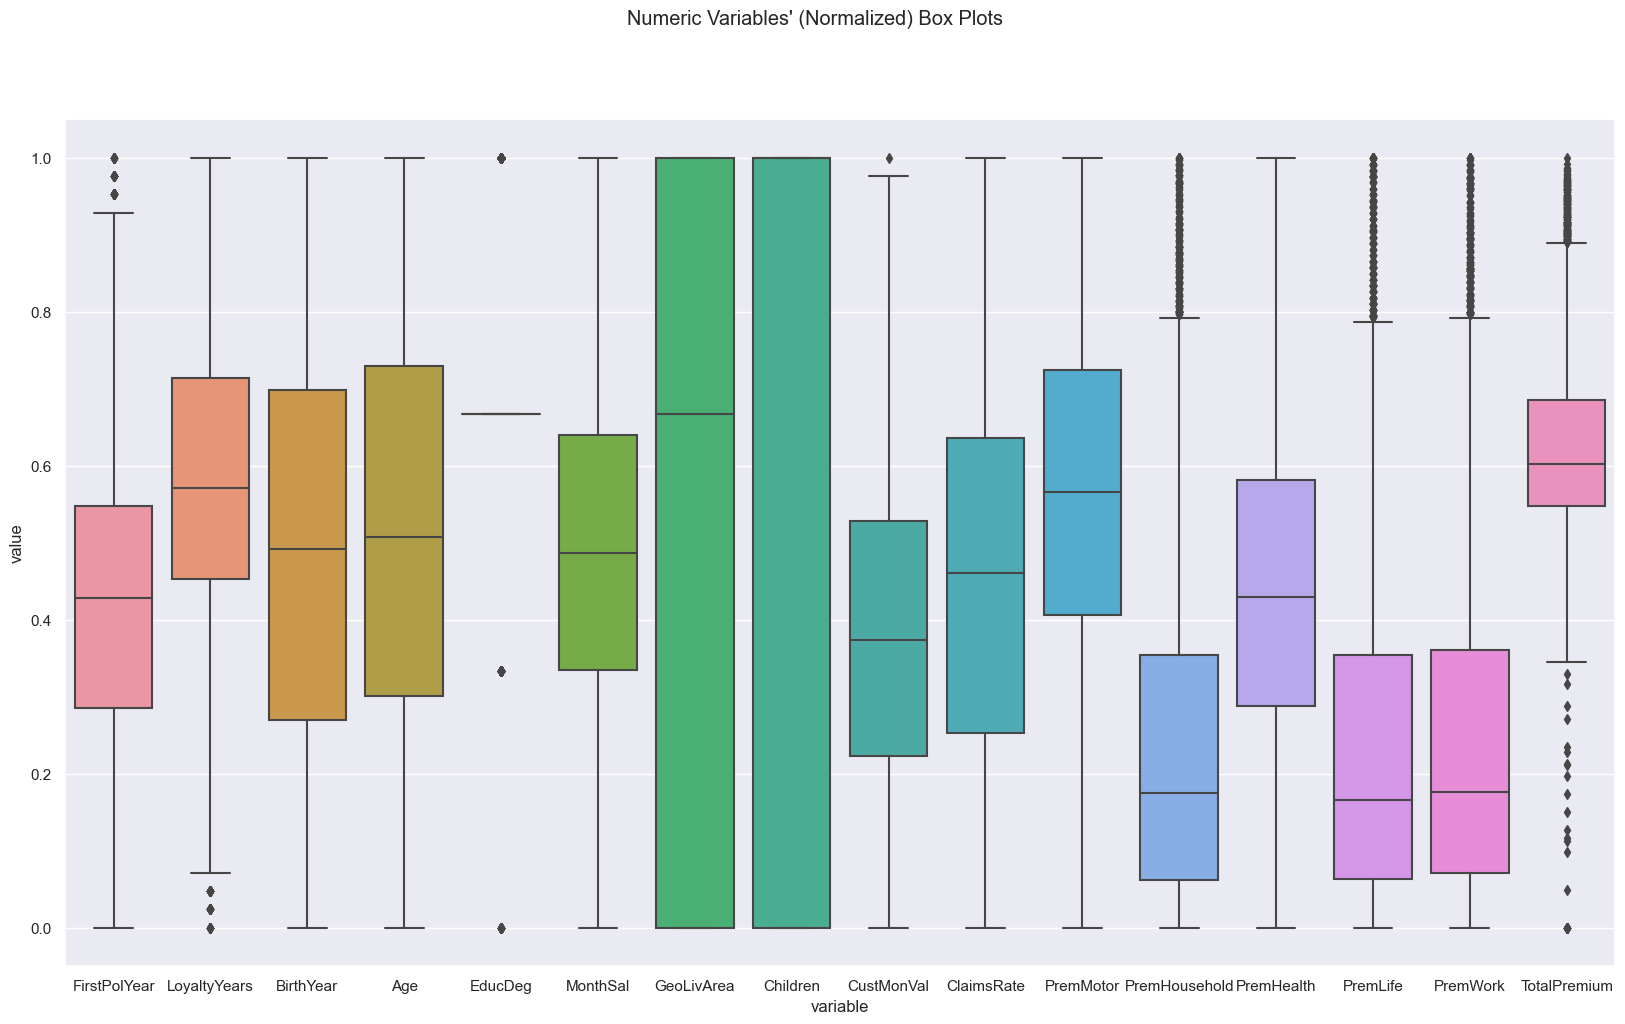

In [1755]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(df_norm_scaled))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Normalized) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_normalized_data_boxplots.png'), dpi=200)
plt.show()

__Standardized Data__

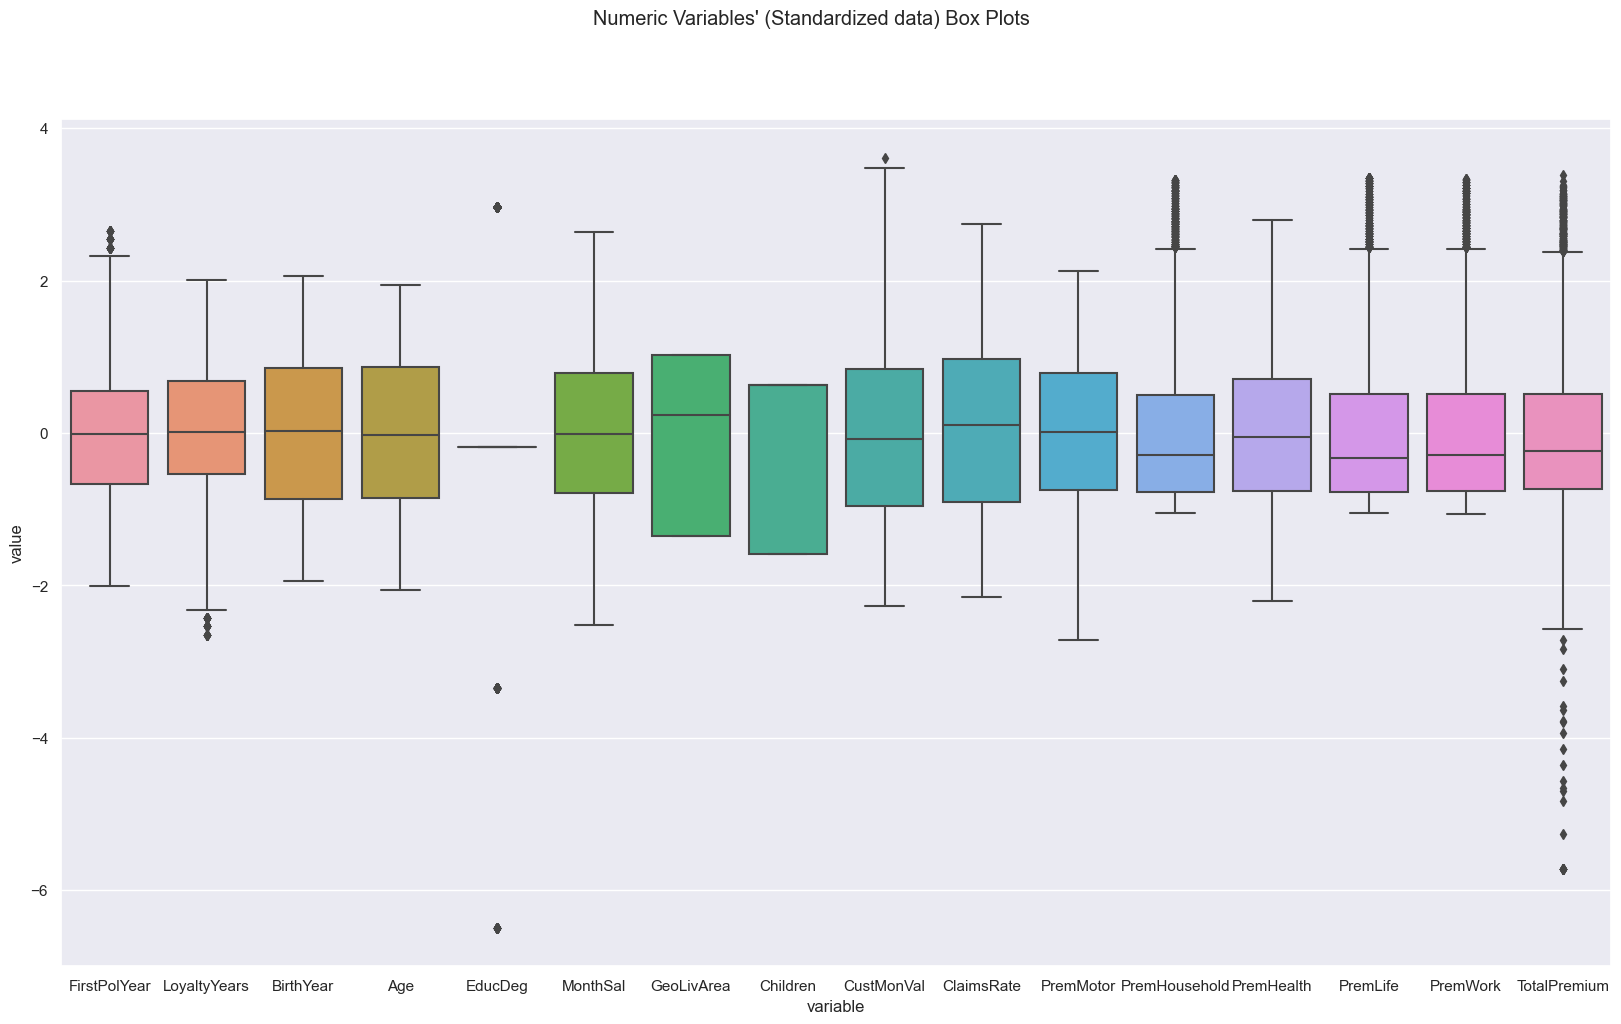

In [1756]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
plt.subplots(figsize=(20, 11))

# Plot data
sns.boxplot(x="variable", y="value", data=pd.melt(df_stand_scaled))

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' (Standardized data) Box Plots"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_standarized_boxplots.png'), dpi=200)
plt.show()

In [1757]:
df_scaled = df_stand_scaled
df_scaled.head()

,FirstPolYear,LoyaltyYears,BirthYear,Age,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,TotalPremium
CustID,,,,,,,,,,,,,,,,
1,0.876849,-0.876849,1.039087,-1.039087,-0.191483,-0.491930,-1.352432,0.631318,0.799582,-0.909584,0.389946,-0.509198,-0.288371,0.602970,-0.463164,-0.363640
3,-0.120571,0.120571,0.276725,-0.276725,-0.191483,-0.381743,0.228520,-1.583988,1.358081,-1.258821,-1.015301,0.483708,-0.573783,1.991797,2.473060,0.240365
4,0.766024,-0.766024,0.975557,-0.975557,-0.191483,-1.679737,1.018996,0.631318,-0.997189,0.995347,-1.211306,-0.756313,1.871355,0.190982,-0.053816,-0.885867
5,-0.120571,0.120571,0.467315,-0.467315,-0.191483,-0.948100,1.018996,0.631318,-0.761418,0.709608,0.081653,-0.725851,0.186399,-0.393639,0.414879,-0.655984
6,-0.674694,0.674694,-0.612698,0.612698,-0.191483,-0.063305,1.018996,0.631318,-1.030329,1.027096,0.927368,-0.923679,-0.701944,-0.809510,-0.792787,-0.978914


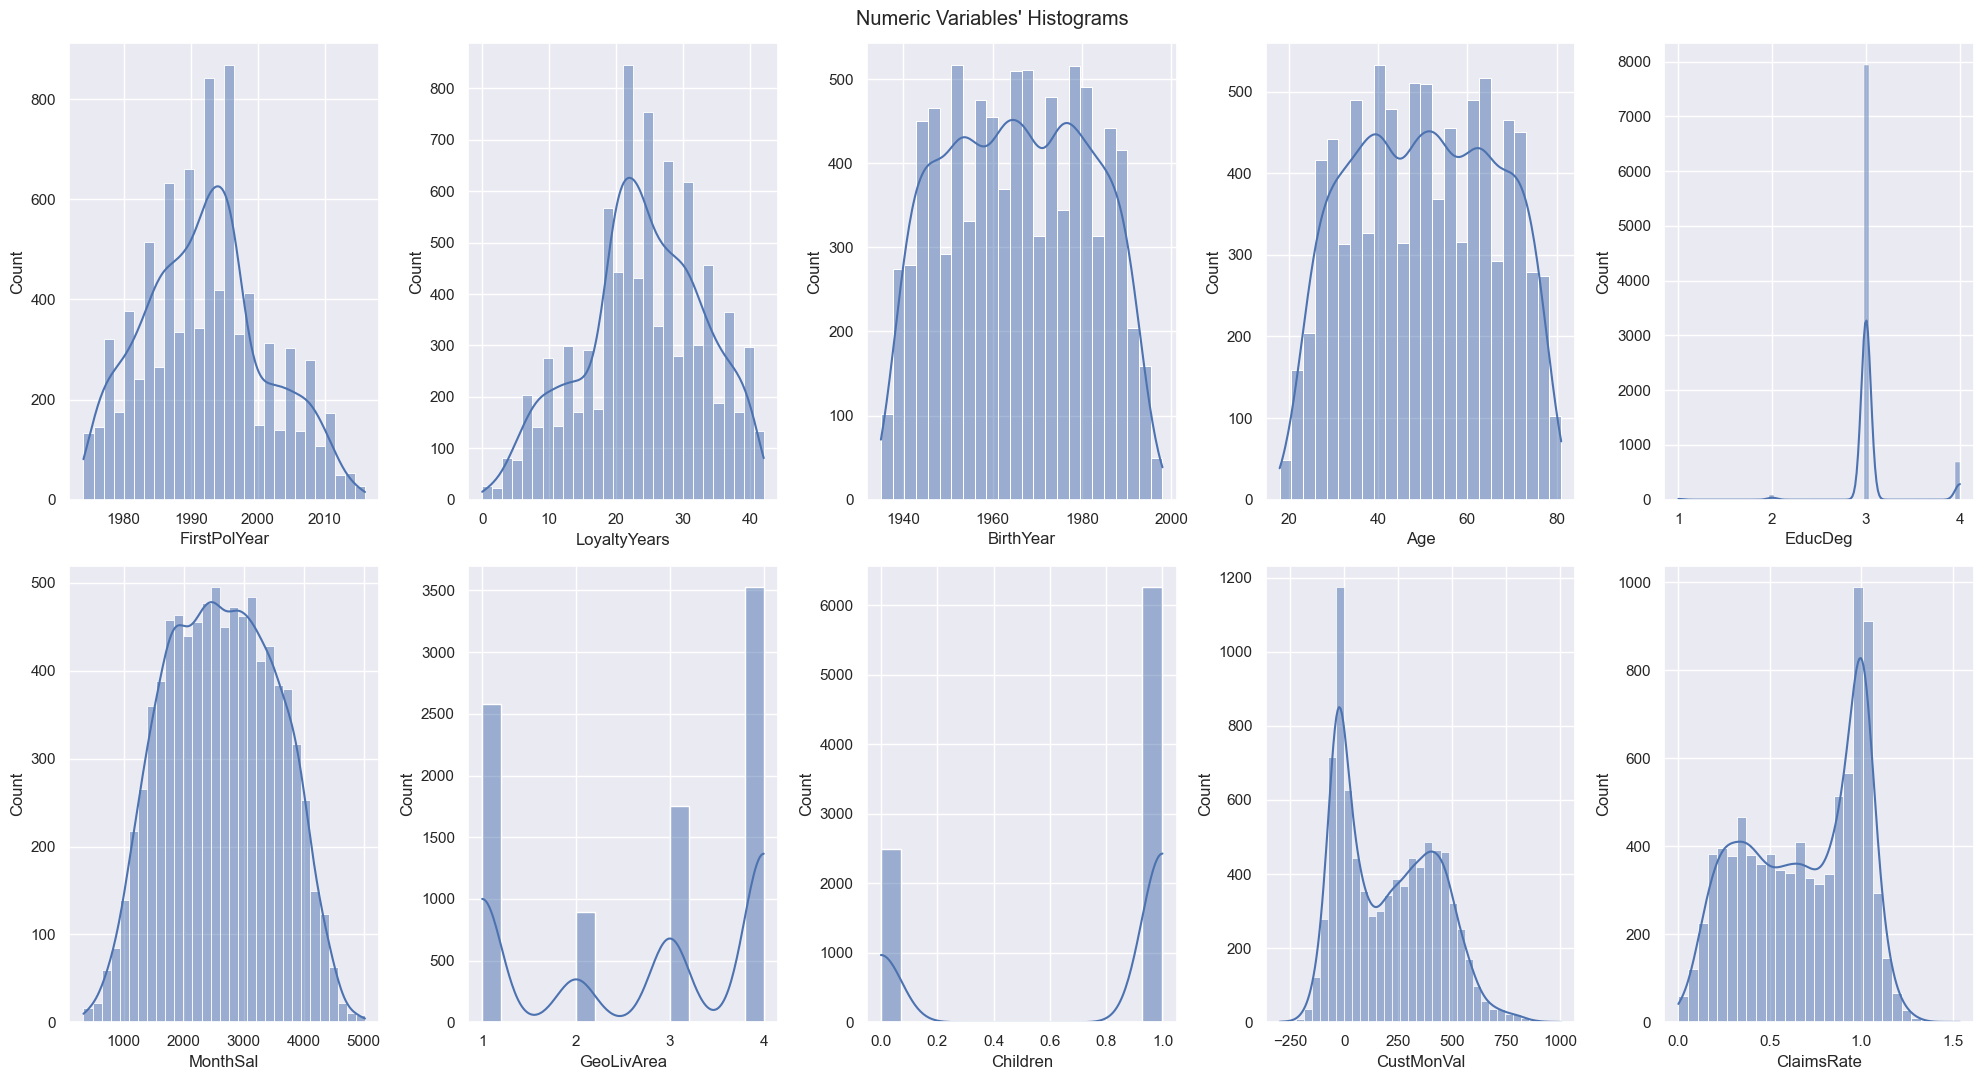

In [1779]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11), tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), df.columns): # Notice the zip() function and flatten() method
    sns.histplot(x=df[feat], ax=ax, kde=True, bins="scott")
    #ax.hist(df[feat], bins="scott", density=True)
    #ax.plot(kde=True)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.savefig(os.path.join(figures_path, 'numeric_variables_frequencies_histograms.png'))
plt.show()

<div class="alert alert-block alert-warning">

<b>Insights</b>
We can notice how scaling the features brings everything into perspective. The features are now more comparable and will have a similar effect on the learning models. After evaluating each method we decided to go with StandardScaler because the use of it brings more advantages
</div


__Data Partitioning__

Partitioning divides the dataset randomly into either two or three parts: training, testing and (optionally) validation, and is used to test the performance of a single model.

- Splitting data set into train and test sets before doing any processing to the data to avoid Data Leakage in the future.


In [1758]:
df_demographics = pd.DataFrame(df_scaled, columns=['BirthYear','Age', 'EducDeg', 'MonthSal', 'GeoLivArea','Children'])

In [1759]:
df_insurance = pd.DataFrame(df_scaled, columns=['FirstPolYear', 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth',
                                                'PremLife', 'PremWork', 'LoyaltyYears', 'TotalPremium'])

In [1760]:
df_insurance.head()

,FirstPolYear,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,LoyaltyYears,TotalPremium
CustID,,,,,,,,,,
1,0.876849,0.799582,-0.909584,0.389946,-0.509198,-0.288371,0.602970,-0.463164,-0.876849,-0.363640
3,-0.120571,1.358081,-1.258821,-1.015301,0.483708,-0.573783,1.991797,2.473060,0.120571,0.240365
4,0.766024,-0.997189,0.995347,-1.211306,-0.756313,1.871355,0.190982,-0.053816,-0.766024,-0.885867
5,-0.120571,-0.761418,0.709608,0.081653,-0.725851,0.186399,-0.393639,0.414879,0.120571,-0.655984
6,-0.674694,-1.030329,1.027096,0.927368,-0.923679,-0.701944,-0.809510,-0.792787,0.674694,-0.978914


### 3. Feature Selection

__Feature Selection__ is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

__Spearman Correlation__

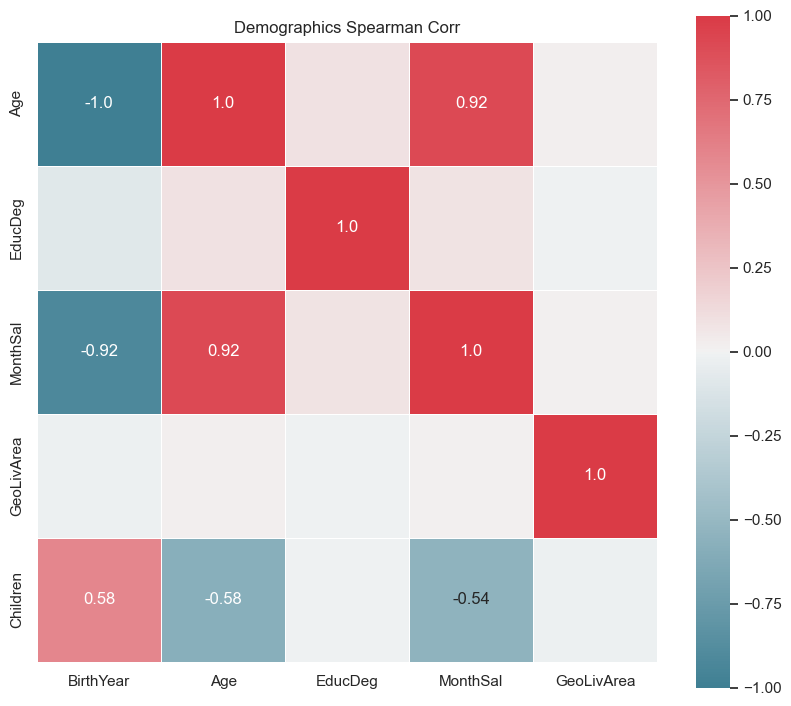

In [1761]:
cor_spearman_demo = df_demographics.corr(method ='spearman')
heatmap_corr(cor= cor_spearman_demo, figures_path= figures_path, title="Demographics Spearman Corr")

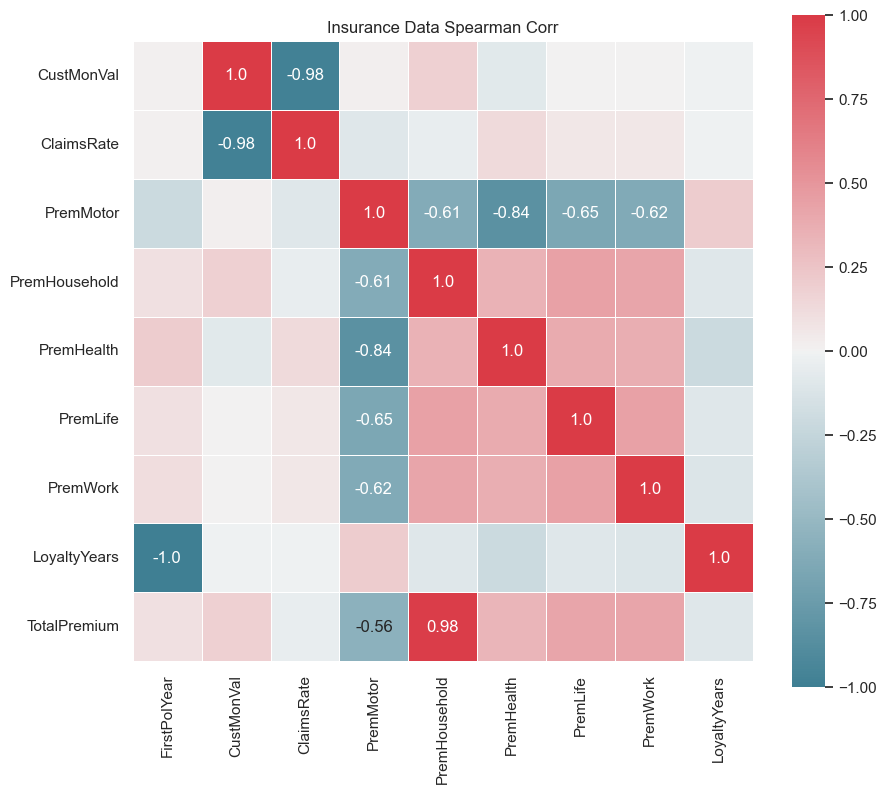

In [1762]:
cor_spearman_insurance = df_insurance.corr(method ='spearman')
heatmap_corr(cor= cor_spearman_insurance, figures_path= figures_path, title="Insurance Data Spearman Corr")

__Pearson Correlation__

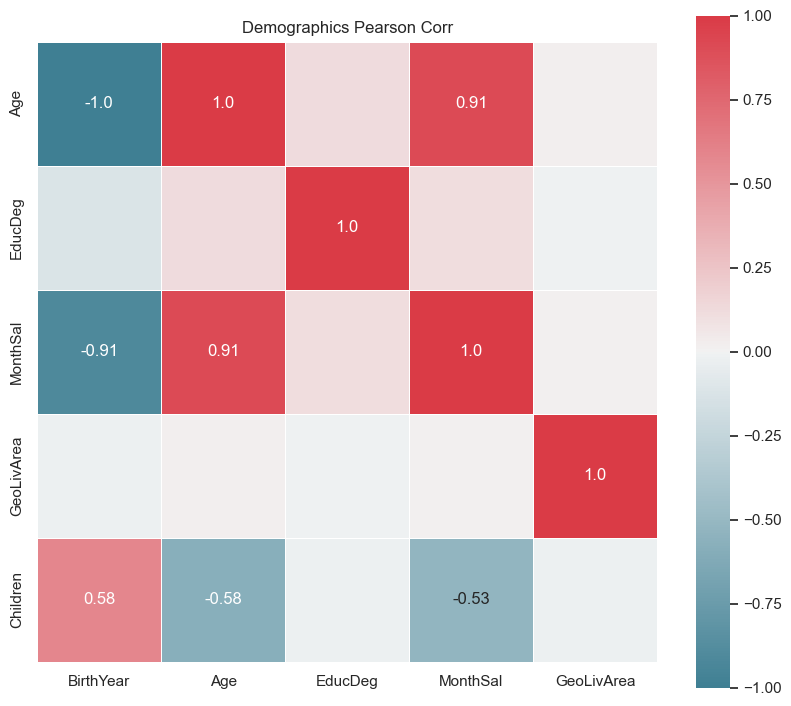

In [1763]:
cor_pearson_demo = df_demographics.corr(method ='pearson')
heatmap_corr(cor= cor_pearson_demo, figures_path= figures_path, title="Demographics Pearson Corr")

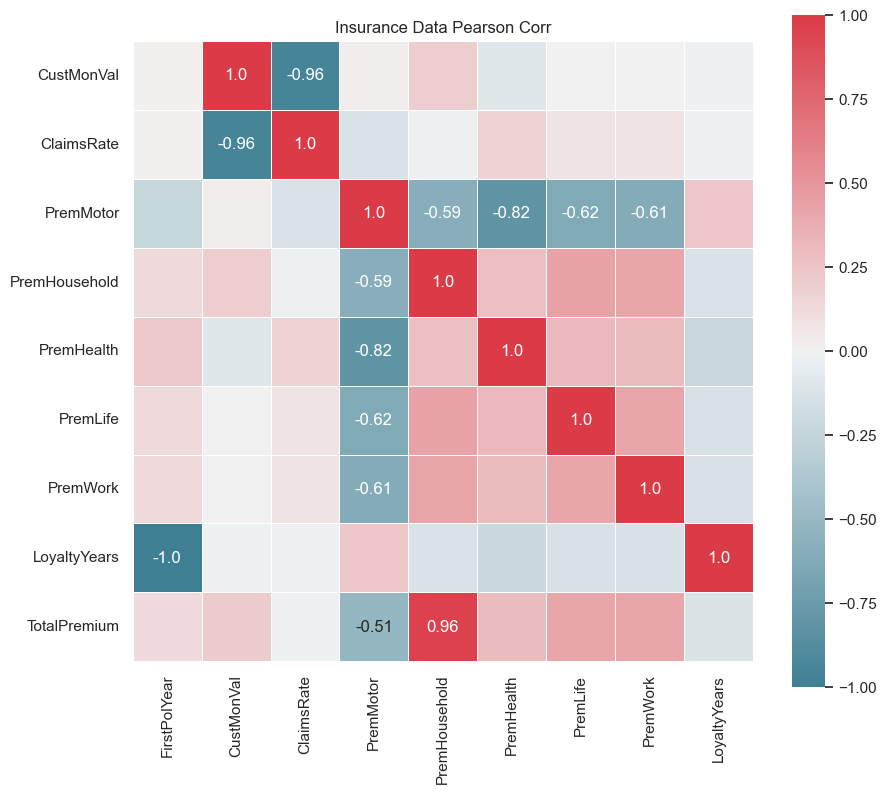

In [1764]:
cor_pearson_insurance = df_insurance.corr(method ='pearson')
heatmap_corr(cor= cor_pearson_insurance, figures_path= figures_path, title="Insurance Data Pearson Corr")